# Zomato Data Analysis Project

## Step 1 :- Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"D:\Pdhai\Datasets\Arun\Pandas Project\Zomato\Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
# df.info()
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Convert the datatype of column ---> rate

In [7]:
def cnvrtRate(value):
    value = str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(cnvrtRate)

df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Q1:- What type Of resturants do the majority of customers order food?

In [9]:
order_counts=df.groupby('listed_in(type)')['name'].count()
order_counts.sort_values(ascending=False)

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: name, dtype: int64

<Axes: xlabel='listed_in(type)', ylabel='name'>

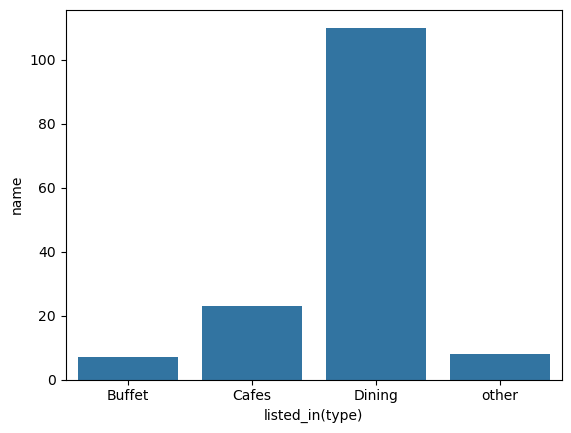

In [10]:
sns.barplot(order_counts)

# Ques 2:- How many votes has each type of resturants received from customer?

In [12]:
resturents_by_vote = df.groupby('listed_in(type)')['votes'].sum()
resturents_by_vote.sort_values(ascending=False)


listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

<Axes: xlabel='listed_in(type)', ylabel='votes'>

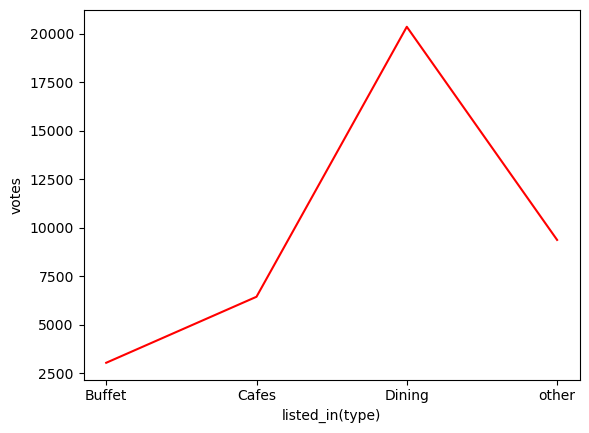

In [13]:
sns.lineplot(resturents_by_vote , color='red')

# Ques 3:- What are the rating that majority of resturants have received?

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
# df['rate'].value_counts().head(10)
majority_ratings = df.groupby('rate').size()
majority_ratings

rate
2.6     1
2.8     2
2.9     7
3.0     2
3.1     7
3.2     7
3.3    14
3.4    12
3.5     6
3.6    11
3.7    15
3.8    20
3.9    10
4.0    10
4.1    11
4.2     8
4.3     1
4.4     2
4.6     2
dtype: int64

<Axes: xlabel='rate', ylabel='Count'>

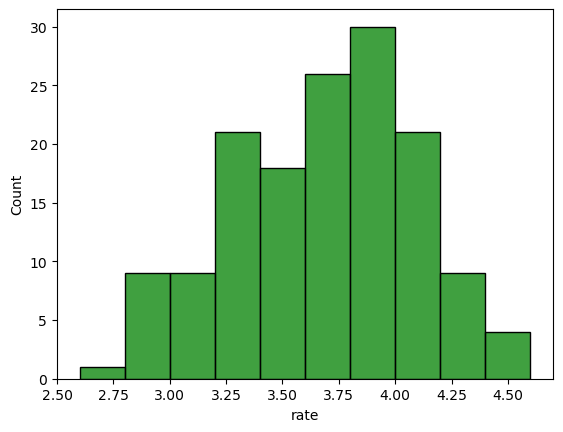

In [17]:
sns.histplot(df['rate'], kde=False, bins=10, color='Green')

# Ques 4:- Average spending of couples on each order?

In [19]:
avg_spending=df["approx_cost(for two people)"].mean()

avg_spending

418.2432432432432

# Ques 5:- Which mode has received the max rating

In [21]:
df.head()

mode_rating=df.groupby('online_order')['rate'].sum()
mode_rating

online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

<Axes: xlabel='online_order', ylabel='rate'>

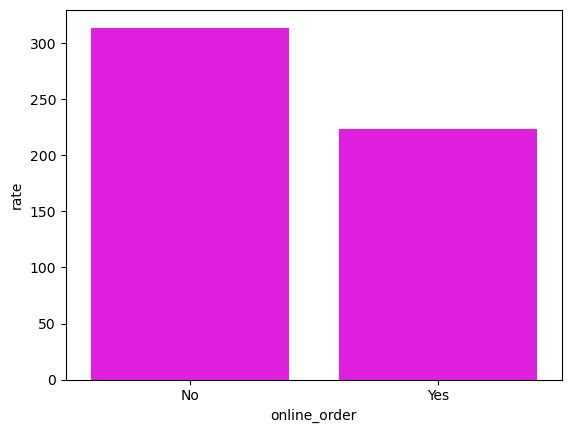

In [22]:
sns.barplot(mode_rating , color='magenta')

# Ques 6:- which type of resturants received more offline orders?

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
offline_order=df[df['online_order']=='No']
offline_counts = offline_order.groupby("listed_in(type)").size()
offline_counts.sort_values(ascending=False)

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
dtype: int64

<Axes: xlabel='listed_in(type)'>

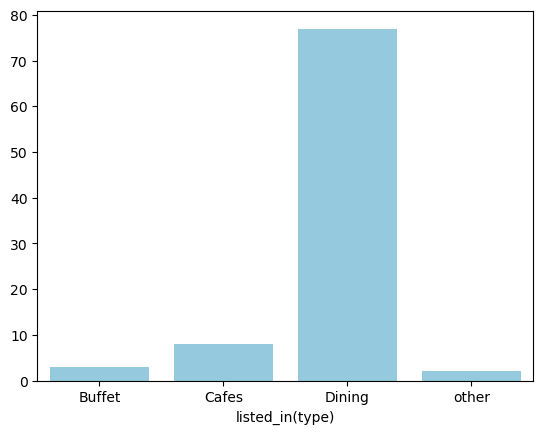

In [26]:
sns.barplot(offline_counts,color='skyblue')